# <center> IAIO Prep 4 </center>
<center> Autor: Morariu Tudor </center>

## Step 1: Data

In [103]:
import pandas as pd
pd.set_option('display.max_columns', 500)


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [104]:
def apply_some_feature_engenering(data):
    data["X_Dim"] = data["X_Maximum"]
    data["Y_Dim"] = data["Y_Maximum"]
    # data["Volume"] = data["X_Perimeter"] * data["Y_Perimeter"] * data["Steel_Plate_Thickness"]

    data["Semi_Parameter"] = data["X_Perimeter"] + data["Y_Perimeter"]

    data["Area"] = data["X_Dim"] * data["Y_Dim"]

    data["Type_Of_Steel"] = data["TypeOfSteel_A400"].apply(lambda x: x)

    cols_drop = ["id", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Maximum", 
                 "X_Minimum", "Y_Maximum", "Y_Minimum", "X_Perimeter", "Y_Perimeter",
                 "LogOfAreas", "Log_X_Index", "Log_Y_Index", "Orientation_Index", "Sum_of_Luminosity"]

    

    data.drop(columns=cols_drop, inplace=True)

    return data

def label_encoding(row):

    row["label"] = int(row["Pastry"] == 1) * 1
    if(row["label"] == 0): row["label"] = int(row["Z_Scratch"] == 1) * 2
    if(row["label"] == 0): row["label"] = int(row["K_Scatch"] == 1) * 3
    if(row["label"] == 0): row["label"] = int(row["Stains"] == 1) * 4
    if(row["label"] == 0): row["label"] = int(row["Dirtiness"] == 1) * 5
    if(row["label"] == 0): row["label"] = int(row["Bumps"] == 1) * 6
    if(row["label"] == 0): row["label"] = int(row["Other_Faults"] == 1) * 7

    return row

train_data = apply_some_feature_engenering(train_data)
test_data = apply_some_feature_engenering(test_data)

# train_data = train_data.apply(label_encoding, axis=1)

In [105]:
# train_data.drop(columns=["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"], inplace=True)

In [106]:
display(train_data)

,Pixels_Areas,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_Dim,Y_Dim,Semi_Parameter,Area,Type_Of_Steel
0,16,113,140,1358,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,-0.0104,0.1417,0,0,0,1,0,0,0,590,909977,13,536886430,1
1,433,70,111,1687,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,-0.2997,0.9491,0,0,0,0,0,0,1,816,728372,74,594351552,0
2,11388,29,141,1400,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,-0.0944,1.0000,0,0,1,0,0,0,0,192,2212144,1125,424731648,1
3,210,114,134,1387,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,-0.0402,0.4025,0,0,1,0,0,0,0,789,3353173,45,2645653497,1
4,521,82,111,1692,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,-0.2455,0.9998,0,0,0,0,0,0,1,1560,618502,139,964863120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,17,122,140,1360,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,0.0044,0.2901,0,0,0,1,0,0,0,757,143219,8,108416783,0
19215,231,104,133,1652,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,-0.0989,0.5378,0,0,0,0,0,0,1,735,2488541,43,1829077635,0
19216,780,41,94,1358,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,-0.4283,0.9997,1,0,0,0,0,0,0,31,1578129,212,48921999,1
19217,126,88,132,1692,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,-0.1162,0.3509,0,0,0,0,0,0,1,18,1713184,39,30837312,0


<Axes: >

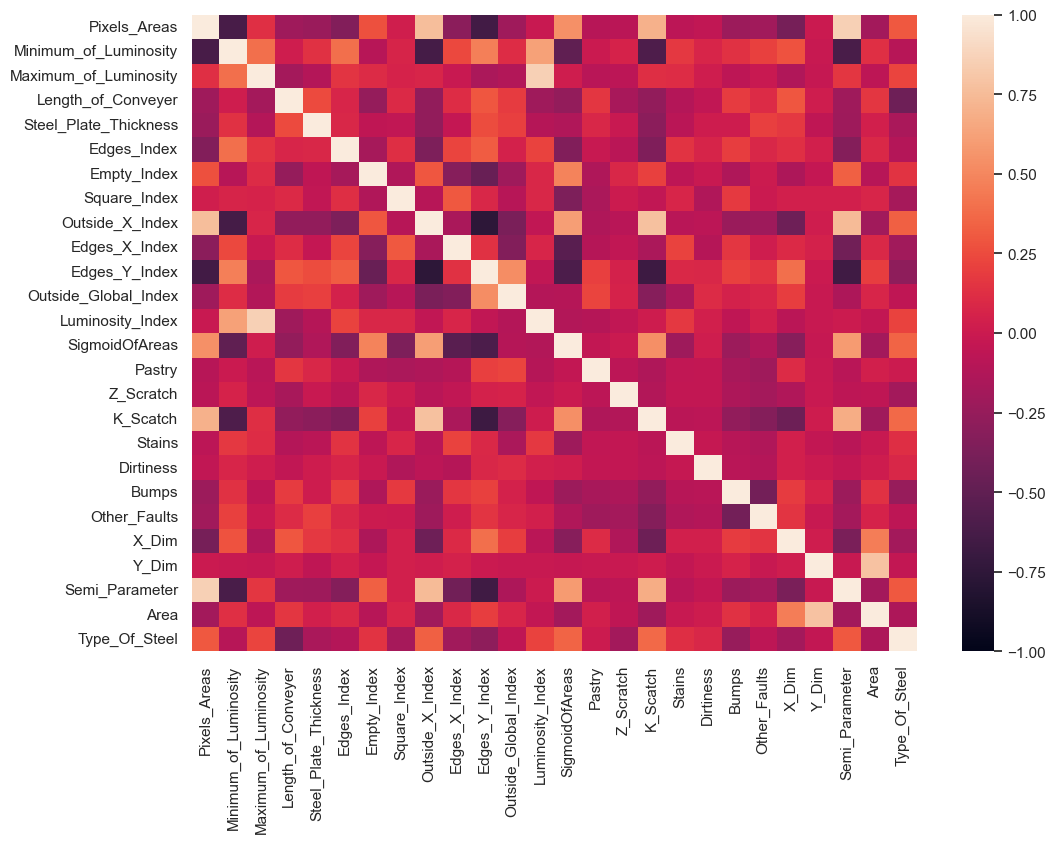

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(train_data.corr(), vmin=-1.0, vmax=1.0, xticklabels=1, yticklabels=1)

array([[<Axes: title={'center': 'Pixels_Areas'}>,
        <Axes: title={'center': 'Minimum_of_Luminosity'}>,
        <Axes: title={'center': 'Maximum_of_Luminosity'}>,
        <Axes: title={'center': 'Length_of_Conveyer'}>,
        <Axes: title={'center': 'Steel_Plate_Thickness'}>],
       [<Axes: title={'center': 'Edges_Index'}>,
        <Axes: title={'center': 'Empty_Index'}>,
        <Axes: title={'center': 'Square_Index'}>,
        <Axes: title={'center': 'Outside_X_Index'}>,
        <Axes: title={'center': 'Edges_X_Index'}>],
       [<Axes: title={'center': 'Edges_Y_Index'}>,
        <Axes: title={'center': 'Outside_Global_Index'}>,
        <Axes: title={'center': 'Luminosity_Index'}>,
        <Axes: title={'center': 'SigmoidOfAreas'}>,
        <Axes: title={'center': 'Pastry'}>],
       [<Axes: title={'center': 'Z_Scratch'}>,
        <Axes: title={'center': 'K_Scatch'}>,
        <Axes: title={'center': 'Stains'}>,
        <Axes: title={'center': 'Dirtiness'}>,
        <Axes: titl

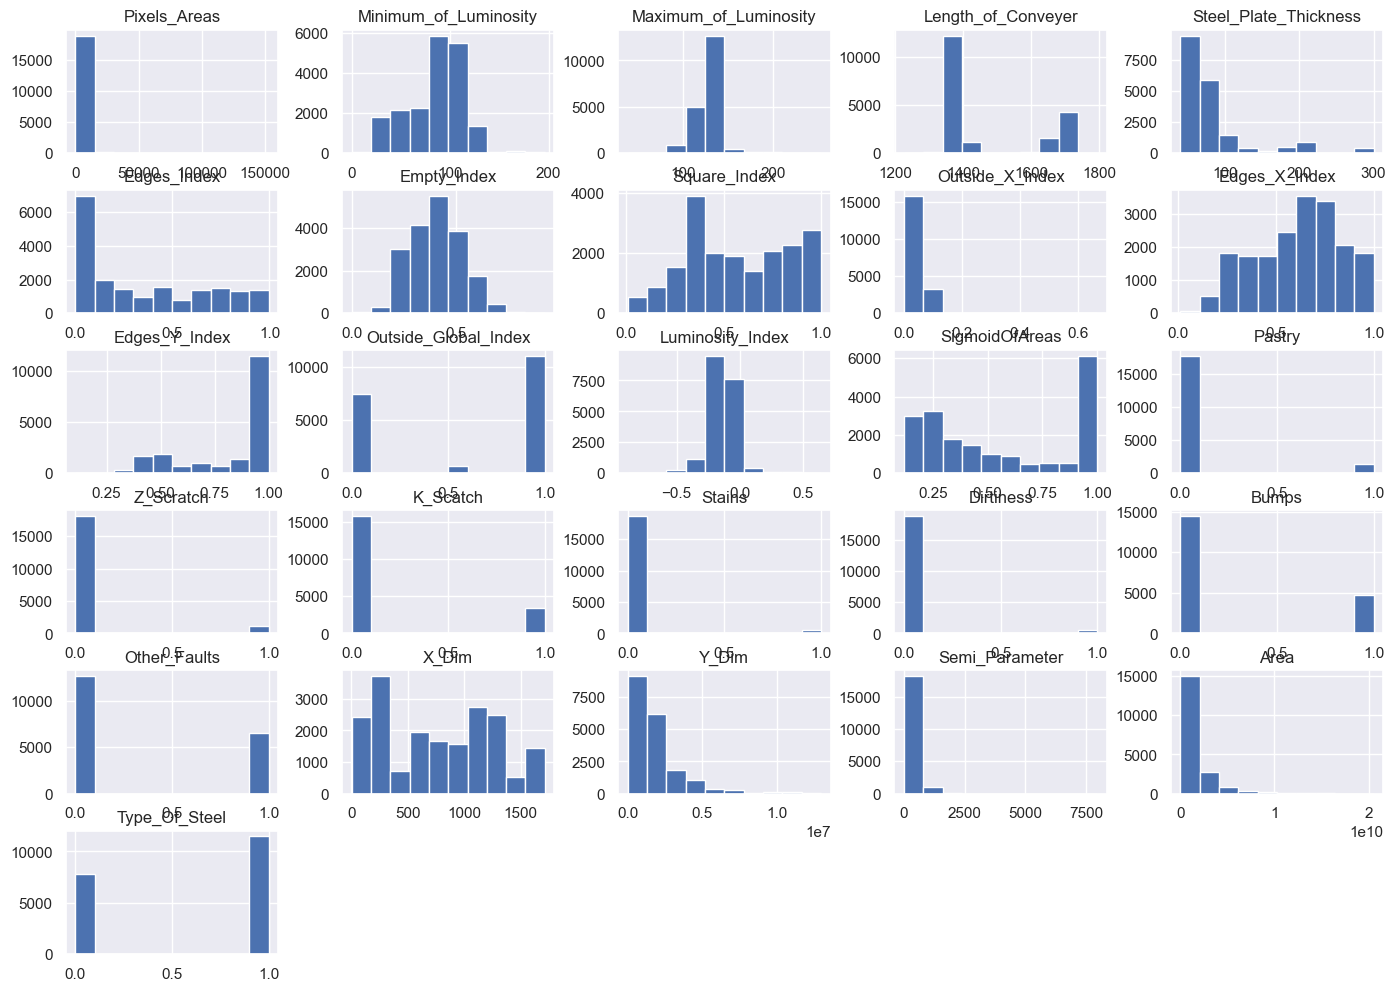

In [108]:
train_data.hist(figsize=(17, 12))

## Step 2: Model Selection and Training

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE

label_cols = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
norm = Normalizer()

train_X, test_X, train_y, test_y = train_test_split(norm.fit_transform(train_data.drop(columns=label_cols)), train_data[label_cols], test_size=0.001)




In [110]:
# import numpy as np

# train_y_mat = []

# for ex in train_y.values:
#     train_y_mat.append(ex.argmax())


# test_y_mat = []

# for ex in test_y.values:
#     test_y_mat.append(ex.argmax())

# test_y = np.array(test_y_mat).reshape(-1, 1)
# train_y = np.array(train_y_mat).reshape(-1, 1)


# # train_X, train_y = SMOTE().fit_resample(train_X, train_y)
# # test_X, test_y = SMOTE().fit_resample(test_X, test_y)


In [111]:
# from imblearn.over_sampling import SMOTEN

# train_X, train_y = SMOTEN().fit_resample(train_X, train_y)
# test_X, test_y = SMOTEN().fit_resample(test_X, test_y)

In [112]:
train_y

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
8871,0,0,0,0,0,0,1
17949,0,0,1,0,0,0,0
8299,0,0,1,0,0,0,0
2182,0,0,0,0,0,0,1
15052,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1550,0,0,0,0,0,0,1
10313,0,0,0,0,0,0,1
15443,1,0,0,0,0,0,0
5963,0,0,0,0,0,0,1


In [113]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
import lightgbm

def objective(trial):
    mat = {
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.14),
        'n_estimators': trial.suggest_int('n_estimators', 350, 800),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.85, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.85, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.85, 1.0),
        'random_state': 42
    }

    model = xgboost.XGBClassifier(**mat)

    scores = cross_val_score(model, train_X, train_y, cv=5)

    return scores.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

best_params = study.best_params

print("Best xgb params:", best_params)


[I 2024-08-26 19:04:30,552] A new study created in memory with name: no-name-2cc407e7-f6f6-4501-a1b0-03bb8cd45fec
[I 2024-08-26 19:06:26,584] Trial 0 finished with value: 0.41543902491968393 and parameters: {'max_depth': 13, 'learning_rate': 0.0173121699358906, 'n_estimators': 616, 'min_child_weight': 2, 'subsample': 0.9783610110447523, 'colsample_bytree': 0.40872651167569274, 'reg_alpha': 0.99813613077206, 'reg_lambda': 0.9097851044845096}. Best is trial 0 with value: 0.41543902491968393.
[W 2024-08-26 19:07:51,548] Trial 1 failed with parameters: {'max_depth': 23, 'learning_rate': 0.02320522443704346, 'n_estimators': 752, 'min_child_weight': 4, 'subsample': 0.8677959675202731, 'colsample_bytree': 0.8604740216502218, 'reg_alpha': 0.854348401558061, 'reg_lambda': 0.9144107868493893} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/tudor/Documents/.venv/lib/python3.9/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
 

KeyboardInterrupt: 

{'max_depth': 8, 'learning_rate': 0.010927411374676708, 'n_estimators': 467, 'min_child_weight': 2, 'subsample': 0.8955651661604775, 'colsample_bytree': 0.10870853299023536, 'reg_alpha': 0.8904728459609123, 'reg_lambda': 0.8525053670903018}

In [58]:
from optuna.visualization import plot_optimization_history

# plot_optimization_history(study)

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
# best_params_xgb = {'max_depth': 5, 'learning_rate': 0.011590306838486029, 'n_estimators': 472, 'min_child_weight': 6, 'subsample': 0.8823754373072108, 'colsample_bytree': 0.10571934017188192, 'reg_alpha': 0.8943961733457828, 'reg_lambda': 0.9047112515908364}

model = xgboost.XGBClassifier(best_params)

model.fit(train_X, train_y)

# scores = cross_val_score(model, train_X, train_y, cv=5, scoring='roc_auc')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
roc_auc_score(test_y, model.predict_proba(test_X))

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
import numpy as np

In [ ]:
test_data = norm.fit_transform(test_data)

In [ ]:
pred_test = model.predict_proba(test_data)

np.array(pred_test).shape

(12814, 7)

In [ ]:
f = open("ans.csv", 'w')

f.write("id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults\n")

for i, pred in enumerate(pred_test):
    f.write(str(i + 19219) + "," + str('{0:.20f}'.format(float(pred[0]))) + "," + str('{0:.20f}'.format(float(pred[1]))) + "," + str('{0:.20f}'.format(float(pred[2]))) + "," + str('{0:.20f}'.format(float(pred[3]))) + "," + str('{0:.20f}'.format(float(pred[4]))) + "," + str('{0:.20f}'.format(float(pred[5]))) + "," + str('{0:.20f}'.format(float(pred[6]))) + "\n")
f.close()